<a href="https://colab.research.google.com/github/csargin/Melbourne-Housing-Market/blob/main/melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
# For Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Modelling and Evaluating Performance of the Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [149]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" %x)
pd.set_option("display.width", 500)

In [150]:
df_ = pd.read_csv("Melbourne_housing_FULL.csv")
df = df_.copy()

### Variable Definitions
* **Suburb** : Suburb
* **Address**: Address
* **Rooms**: Number of rooms
* **Price**: Price in Australian dollars
* **Method**:
  * **S**: Property sold
  * **SP**: Property sold prior
  * **PI**: Property passed in
  * **PN**: Sold prior not disclosed
  * **SN**: Sold not disclosed
  * **NB**: No bid
  * **VB**: Vendor bid
  * **W**: Withdrawn prior to auction
  * **SA**: Sold after auction
  * **SS**: Sold after auction price not disclosed
  * **N/A**: Price or highest bid not available
* **Type**:
  * **br**: Bedroom(s)
  * **h**: House, cottage, villa, semi, terrace
  * **u**: unit, duplex
  * **t**: townhouse
  * **dev** site: Development site
  * **o res**: Other residential
* **SellerG**: Real Estate Agent
* **Date**: Date sold
* **Distance**: Distance from CBD in kilometers
* **Regionname**: General Region (West, North West, North, North east …etc)
* **Propertycount**: Number of properties that exist in the suburb.
* **Bedroom2** : Scraped # of Bedrooms (from different source)
* **Bathroom**: Number of Bathrooms
* **Car**: Number of carspots
* **Landsize**: Land Size in Metres
* **BuildingArea**: Building Size in Metres
* **YearBuilt**: Year the house was built
* **CouncilArea**: Governing council for the area
* **Lattitude**: Self explanitory
* **Longtitude**: Self explanitory

In [151]:
# Check first 5 rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [152]:
# Check last 5 rows
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00
34856,Yarraville,3 Tarrengower St,2,h,1020000.00,PI,RW,24/02/2018,6.30,3013.00,2.00,1.00,0.00,250.00,103.00,1930.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00


In [153]:
# Check total observations and columns
df.shape

(34857, 21)

In [154]:
# Information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [155]:
# Check missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [156]:
# Check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [157]:
duplicate_rows = df[df.duplicated()]

In [158]:
df = df.drop_duplicates()

In [159]:
df.shape

(34856, 21)

In [160]:
df.dropna(subset=['Price'], inplace=True)

In [161]:
df.shape

(27247, 21)

In [162]:
# Unique values for all columns
for col in df.columns:
  print(f"{col} have {df[col].nunique()} unique values.\n")

Suburb have 345 unique values.

Address have 26751 unique values.

Rooms have 12 unique values.

Type have 3 unique values.

Price have 2871 unique values.

Method have 5 unique values.

SellerG have 349 unique values.

Date have 78 unique values.

Distance have 213 unique values.

Postcode have 209 unique values.

Bedroom2 have 14 unique values.

Bathroom have 10 unique values.

Car have 13 unique values.

Landsize have 1557 unique values.

BuildingArea have 662 unique values.

YearBuilt have 151 unique values.

CouncilArea have 33 unique values.

Lattitude have 11366 unique values.

Longtitude have 12275 unique values.

Regionname have 8 unique values.

Propertycount have 336 unique values.



In [163]:
# Catching categorical columns

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
            Degisken isimleri alinmak istenilen dataframe

        cat_th: int, optional
            Numerik fakat kategorik olan degiskenler için sinif esik degeri

        car_th: int, optional
            Kategorik fakat kardinal degiskenler için sinif esik degeri

    Returns
    ------
        cat_cols: list
            Kategorik degisken listesi

        num_cols: list
            Numerik degisken listesi


    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                  dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                  dataframe[col].dtypes =="O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"Categorical but Cardinal Columns: {len(cat_but_car)}")
    print(f"Numerical but Categorical Columns: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [164]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, car_th=20)

Observations: 27247
Variables: 21
Categorical Columns: 3
Numerical Columns: 13
Categorical but Cardinal Columns: 5
Numerical but Categorical Columns: 0


In [165]:
for col in cat_cols:
    print(f"{col} - have {df[col].nunique()} unique values")

Type - have 3 unique values
Method - have 5 unique values
Regionname - have 8 unique values


In [166]:
for col in num_cols:
    print(f"{col} - have {df[col].nunique()} unique values")

Rooms - have 12 unique values
Price - have 2871 unique values
Distance - have 213 unique values
Postcode - have 209 unique values
Bedroom2 - have 14 unique values
Bathroom - have 10 unique values
Car - have 13 unique values
Landsize - have 1557 unique values
BuildingArea - have 662 unique values
YearBuilt - have 151 unique values
Lattitude - have 11366 unique values
Longtitude - have 12275 unique values
Propertycount - have 336 unique values


In [167]:
for col in cat_but_car:
    print(f"{col} - have {df[col].nunique()} unique values")

Suburb - have 345 unique values
Address - have 26751 unique values
SellerG - have 349 unique values
Date - have 78 unique values
CouncilArea - have 33 unique values


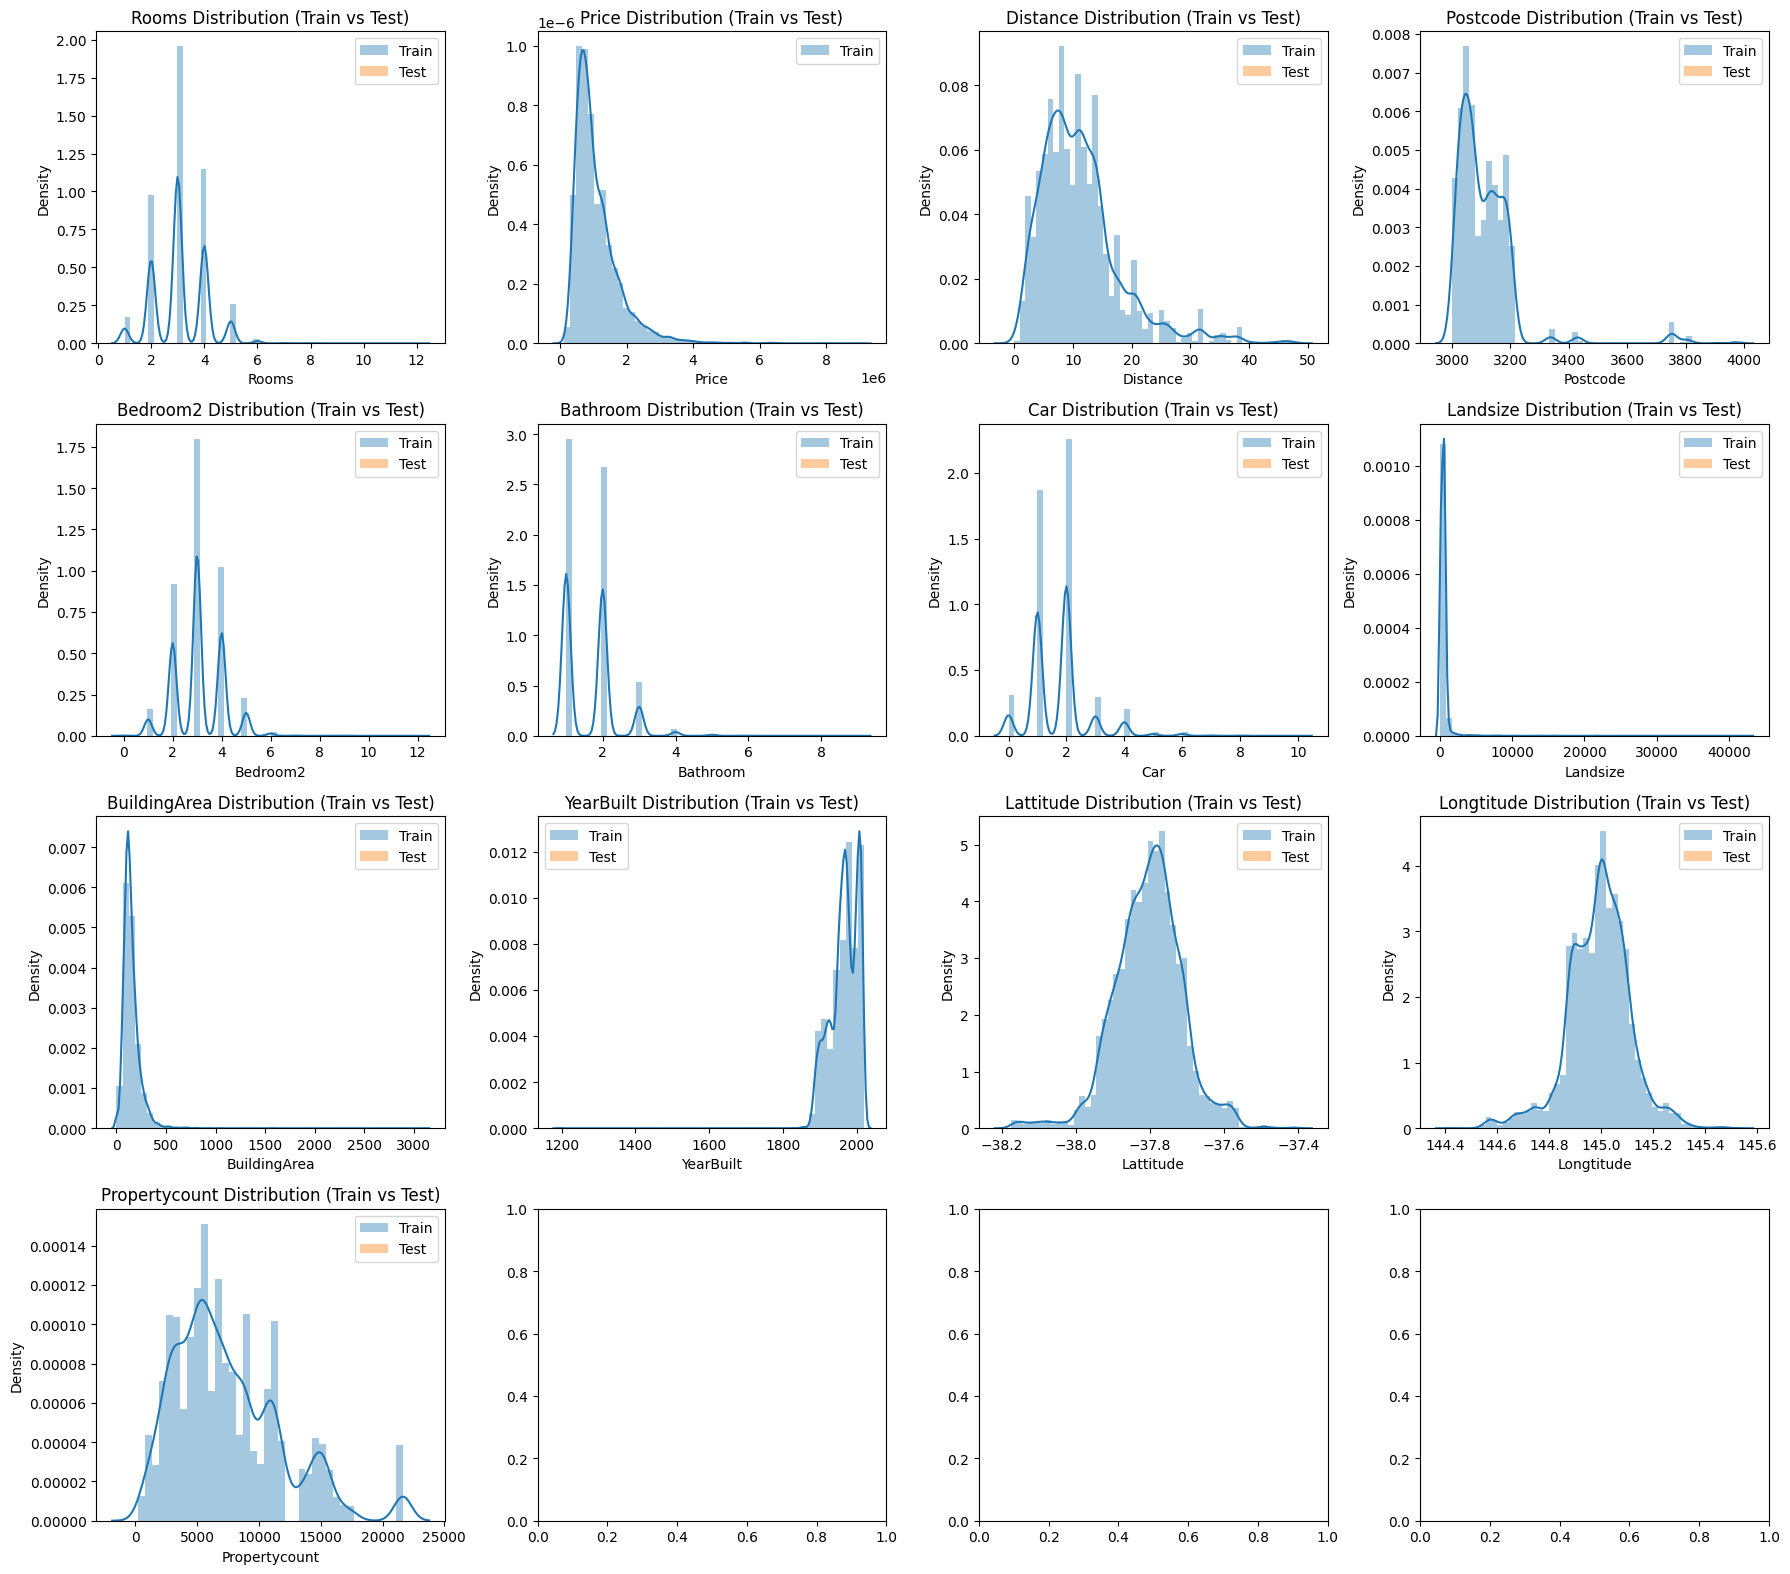

In [168]:
import warnings
warnings.filterwarnings("ignore")

cat_features = cat_cols
num_features = num_cols
target_col = 'Price'

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

df_train = df.dropna()
df_test = df[df['Price'].isna()]

plot_histograms(df_train[num_features], df_test[num_features], target_col, n_cols=4)

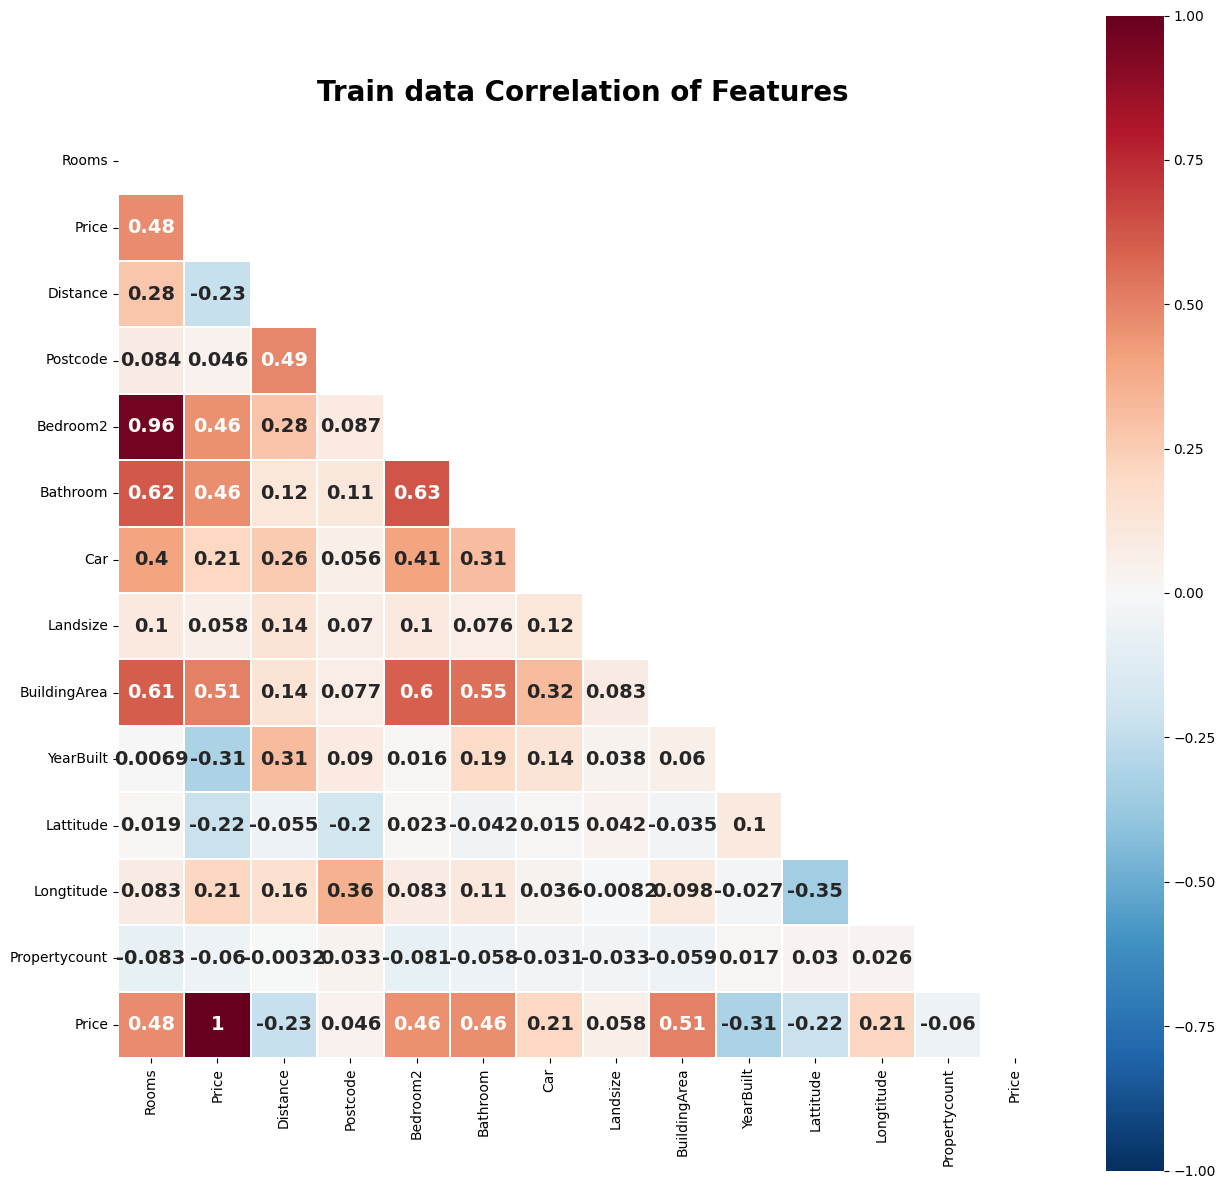

In [169]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0,
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_features+[target_col]], title='Train data')

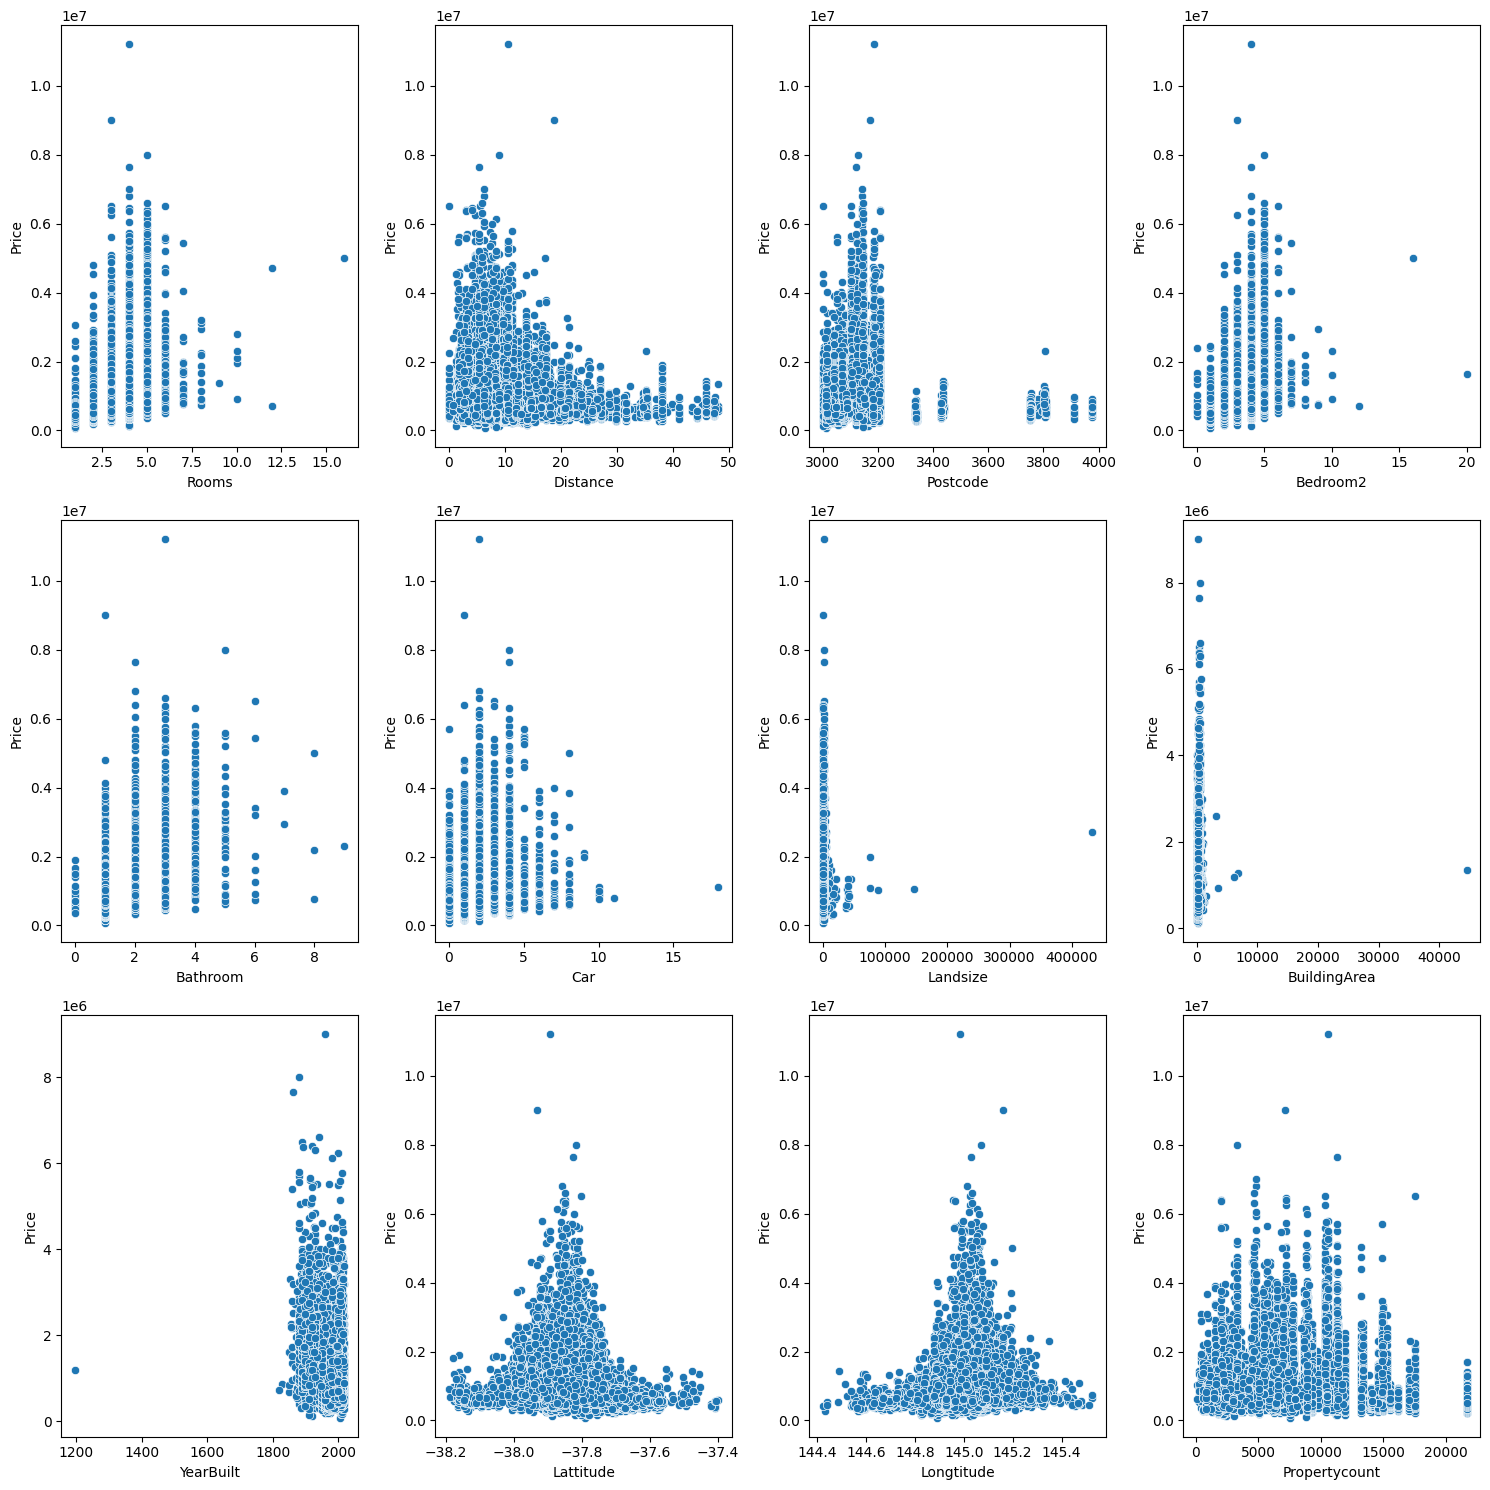

In [170]:

other_cols = [col for col in num_features if col != target_col]

# Subplot boyutları
n_cols = 4
n_rows = int(np.ceil(len(other_cols) / n_cols))

# Figür ve eksenler oluştur
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Düzgün bir 1D array'e dönüştür (tek satır varsa 2D array olmaması için)
axes = axes.flatten()

# Scatter plotlarını çiz
for i, col in enumerate(other_cols):
    sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i])

# Fazla eksenleri gizle
for i in range(len(other_cols), n_cols * n_rows):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [171]:
# Seperating train-test

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [172]:
X_train.shape

(20435, 20)

In [173]:
X_test.shape

(6812, 20)

In [174]:
y_train.shape[0]

20435

In [175]:
y_test.shape[0]

6812

In [176]:
# Definin outlier thresholds

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)

    interquantile_range = quartile3 - quartile1

    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    return low_limit, up_limit

In [177]:
# Check outlier for a variable

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)

    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [178]:
num_cols = [col for col in num_cols if col not in "Price"]

In [179]:
for col in num_cols:
    low_limit, up_limit = outlier_thresholds(X_train, col)

    print(f"{col}\nLow Limit = {low_limit}\nUp Limit = {up_limit}\n")

Rooms
Low Limit = -2.5
Up Limit = 9.5

Distance
Low Limit = -30.3
Up Limit = 57.7

Postcode
Low Limit = 2730.975000000002
Up Limit = 3488.3749999999964

Bedroom2
Low Limit = -2.5
Up Limit = 9.5

Bathroom
Low Limit = -2.0
Up Limit = 6.0

Car
Low Limit = -6.0
Up Limit = 10.0

Landsize
Low Limit = -1485.0
Up Limit = 2475.0

BuildingArea
Low Limit = -316.9499999999989
Up Limit = 672.2499999999982

YearBuilt
Low Limit = 1730.5
Up Limit = 2182.5

Lattitude
Low Limit = -38.37005850000001
Up Limit = -37.2521905

Longtitude
Low Limit = 144.21561200000002
Up Limit = 145.767316

Propertycount
Low Limit = -18067.5
Up Limit = 35656.5



In [180]:
X_train_outlier = []

for col in num_cols:
    print(col, check_outlier(X_train, col))

    if check_outlier(X_train, col) == True:
        X_train_outlier.append(col)

Rooms True
Distance False
Postcode True
Bedroom2 True
Bathroom True
Car False
Landsize True
BuildingArea True
YearBuilt True
Lattitude False
Longtitude False
Propertycount False


In [181]:
X_train_outlier

['Rooms',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'BuildingArea',
 'YearBuilt']

There are some outliers in **Rooms**, **Postcode**, **Bedroom2**, **Bathroom**, **Car**, **Landsize**, **BuildingArea**, and **YearBuilt** variables. **Price** is our target value. So we check the ourliers without Price variable.

In [182]:
# Catching outliers in variables

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [183]:
outlier_indices = []

for col in X_train_outlier:
    indices = grab_outliers(X_train, col, index=True)
    outlier_indices.extend(indices)

          Suburb           Address  Rooms Type Method   SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt              CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
7598   Parkville  84 Flemington Rd     10    h     VB    Nelson  16/04/2016      2.60   3052.00       NaN       NaN  NaN       NaN           NaN        NaN   Melbourne City Council     -37.79      144.94  Northern Metropolitan        2309.00
26210    Mitcham    20 Harrison St     16    h      S    Buxton  28/10/2017     17.20   3132.00     16.00      8.00 8.00       NaN           NaN        NaN  Whitehorse City Council     -37.81      145.20   Eastern Metropolitan        6871.00
12959   Hawthorn    10 Berkeley St     12    h     PI  Property  20/05/2017      4.60   3122.00       NaN       NaN  NaN       NaN           NaN        NaN  Boroondara City Council     -37.83      145.04  Southern Metropolitan       11308.00
2613     Burwood   445 Warrigal 

In [184]:
len(outlier_indices)

523

In [185]:
X_train.shape

(20435, 20)

In [186]:
X_train = X_train.drop(index=outlier_indices)

In [187]:
X_train.shape[0]

19918

In [188]:
y_train.shape[0]

20435

In [189]:
y_train = y_train.drop(index=outlier_indices)

In [190]:
y_train.shape[0]

19918

In [191]:
20435 - 19899

536

We removed totally 536 values from X_train dataset.

In [192]:
num_cols

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [193]:
label_encoder = LabelEncoder()

In [194]:
for col in cat_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])

In [195]:
for col in cat_but_car:
    X_train[col] = label_encoder.fit_transform(X_train[col])

In [196]:
imputer = KNNImputer(n_neighbors=5)

X_train_imputed = imputer.fit_transform(X_train)

In [197]:
for col in cat_cols:
    X_test[col] = label_encoder.fit_transform(X_test[col])

In [198]:
for col in cat_but_car:
    X_test[col] = label_encoder.fit_transform(X_test[col])

In [199]:
imputer = KNNImputer(n_neighbors=5)

X_test_imputed = imputer.fit_transform(X_test)

In [200]:
missing_values = np.isnan(X_train_imputed)
missing_counts = np.sum(missing_values, axis=0)
total_missing = np.sum(missing_counts)

In [201]:
print("Missing Values for all variables:")
print(missing_counts)

Missing Values for all variables:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [202]:
X_train_imputed.shape[0]

19918

In [203]:
y_train.shape[0]

19918

In [204]:
estimator = DecisionTreeRegressor()

models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators = 20, learning_rate = 1, loss = 'exponential', random_state = 42, estimator=estimator)
}

In [205]:
for model_name, model in models.items():
    model.fit(X_train_imputed, y_train)
    predict = model.predict(X_test_imputed)
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predict)

    print(f"##########{model_name}##########")
    print("Mean Absolute Error:  ",mae)
    print("Mean Seqaure Error:  ",mse)
    print("R Mean Seqaure Error:  ",rmse)
    print("R2:  ",r2)
    print("Model Skoru:  ",model.score(X_test_imputed,y_test))
    print("\n")

##########Lasso##########
Mean Absolute Error:   317543.781245705
Mean Seqaure Error:   1104541635635.2673
R Mean Seqaure Error:   1050971.7577724282
R2:   -1.7999435114129865
Model Skoru:   -1.7999435114129865


##########LinearRegression##########
Mean Absolute Error:   317543.17855425057
Mean Seqaure Error:   1104517703294.9092
R Mean Seqaure Error:   1050960.3718955864
R2:   -1.7998828444368065
Model Skoru:   -1.7998828444368065


##########Ridge##########
Mean Absolute Error:   317570.61323428125
Mean Seqaure Error:   1105111769194.8708
R Mean Seqaure Error:   1051242.9639216952
R2:   -1.8013887640945954
Model Skoru:   -1.8013887640945954


##########ElasticNet##########
Mean Absolute Error:   349448.13680477877
Mean Seqaure Error:   2223994406853.393
R Mean Seqaure Error:   1491306.275334947
R2:   -4.637685812818177
Model Skoru:   -4.637685812818177


##########KNeighborsRegressor##########
Mean Absolute Error:   421639.43502642395
Mean Seqaure Error:   376411940294.2355
R Mean S